In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (19, 19)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
from gee_scripts.plots import get_ts_plot
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator
import seaborn as sns
from gee_scripts.parameters import explain_vars, response_var, west_region_ids, center_region_ids


Earth Engine initialized successfully, with ee-indonesia-gwl


In [5]:
df = pd.read_csv("data/9_clean_training_data/all_training_data_with_extra_and_locations_and_precipSum.csv", parse_dates=["date"])
df = df[df.region_id.isin(center_region_ids)]
len(df)
# assert df[["date"]].dtypes.iloc[0] == "datetime64[ns]"


6063

In [6]:
# # group by id and get the number of dates for each station id
# df_grouped = df.groupby("id").count().reset_index()
# df_grouped = df_grouped[["id", "date"]]
# df_grouped.columns = ["id", "date_count"]
# df_grouped.sort_values(by="date_count", ascending=False)

In [7]:
# # get a boxplot of response var per region but use a small graph size

# # set the seaborn style and size
# sns.set_style("whitegrid")
# sns.set(rc={'figure.figsize':(8,5)})
# sns.boxplot(x="region_id", y="gwl_cm", data=df, width=0.5)

In [8]:
west_region_ids = [1, 6, 5, 2, 4]
center_region_ids = [7,8, 10]
east_region_ids = [3, 9]

In [9]:
selected_regions = center_region_ids
filter_rule = df.region_id.isin(selected_regions)
filtered_df = df[filter_rule]
filtered_df.loc[:, 'date'] = pd.to_datetime(filtered_df['date'])  # Ensure 'date' is datetime type
# sort the dataframe by date
filtered_df = filtered_df.sort_values(by="date", ascending=True)


<Axes: ylabel='gwl_cm'>

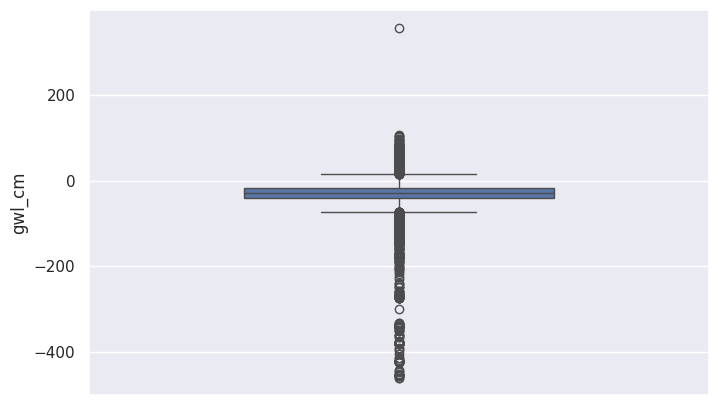

In [10]:
# set the seaborn style and size
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(y="gwl_cm", data=filtered_df, width=0.5)

In [11]:
# selected_regions = [5, 2]

# # Set the figure size
# fig, axs = plt.subplots(len(selected_regions), 1, figsize=(15, 3*len(selected_regions)))

# min_date = west_df['date'].min()
# max_date = west_df['date'].max()

# # Iterate over the region IDs and create a separate plot for each region
# for i, region_id in enumerate(selected_regions):
#     ax = axs[i]
#     to_plot_df = west_df[(west_df.region_id==region_id) & (west_df.source.isin(["brg", "brg_old", "old_brg"]))]
#     sns.lineplot(x="date", y="gwl_cm", data=to_plot_df, ax=ax)
#     ax.set_title(f"Region {region_id} - length: {len(to_plot_df)}")
#     ax.set_xlabel("Date")
#     ax.set_ylabel("GWL (cm)")
    
#     # Set the limits for the x-axis
#     ax.set_xlim(min_date, max_date)

#     # Use MonthLocator for sparse labeling
#     ax.xaxis.set_major_locator(MonthLocator())

#     # Rotate the x-axis labels for better readability
#     plt.setp(ax.get_xticklabels(), rotation=45)


# # Adjust the spacing between the subplots
# plt.tight_layout()

# # Show the plots
# plt.show()

In [12]:
filtered_df.loc[:, ["gwl_cm"]].describe()

,gwl_cm
count,6063.000000
mean,-38.361576
std,60.446235
min,-460.000000
25%,-40.000000
50%,-29.700000
75%,-18.000000
max,358.400000


<Axes: xlabel='region_id', ylabel='gwl_cm'>

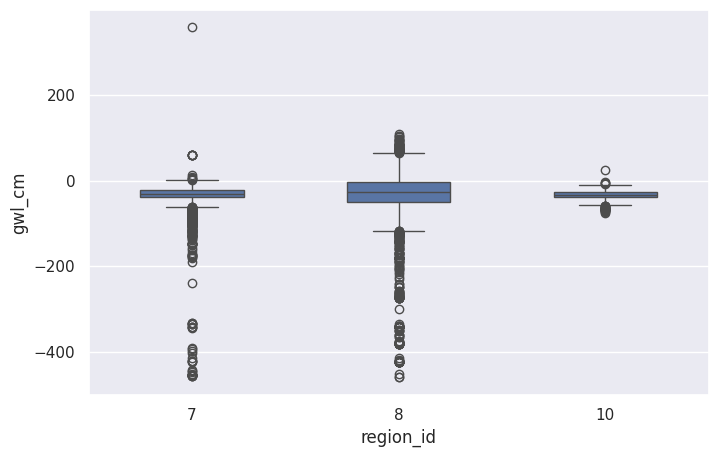

In [13]:
# get a boxplot of response var per region but use a small graph size

# set the seaborn style and size
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="region_id", y="gwl_cm", data=filtered_df, width=0.5)

In [14]:
# # Calculate Q1 and Q3 for each region
# Q1 = df.groupby('region_id')['gwl_cm'].quantile(0.25)
# Q3 = df.groupby('region_id')['gwl_cm'].quantile(0.75)

# # Calculate IQR for each region
# IQR = Q3 - Q1

# # Define bounds for outliers for each region
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Map the lower and upper bounds for each region_id in df
# df_lower_bound = df['region_id'].map(lower_bound)
# df_upper_bound = df['region_id'].map(upper_bound)

# # Filter out outliers
# filtered_df = df[~((df['gwl_cm'] < df_lower_bound) | (df['gwl_cm'] > df_upper_bound))]
# # filtered_df

## Plot GWL_cm vs PHU

Plotting time series for region_id...


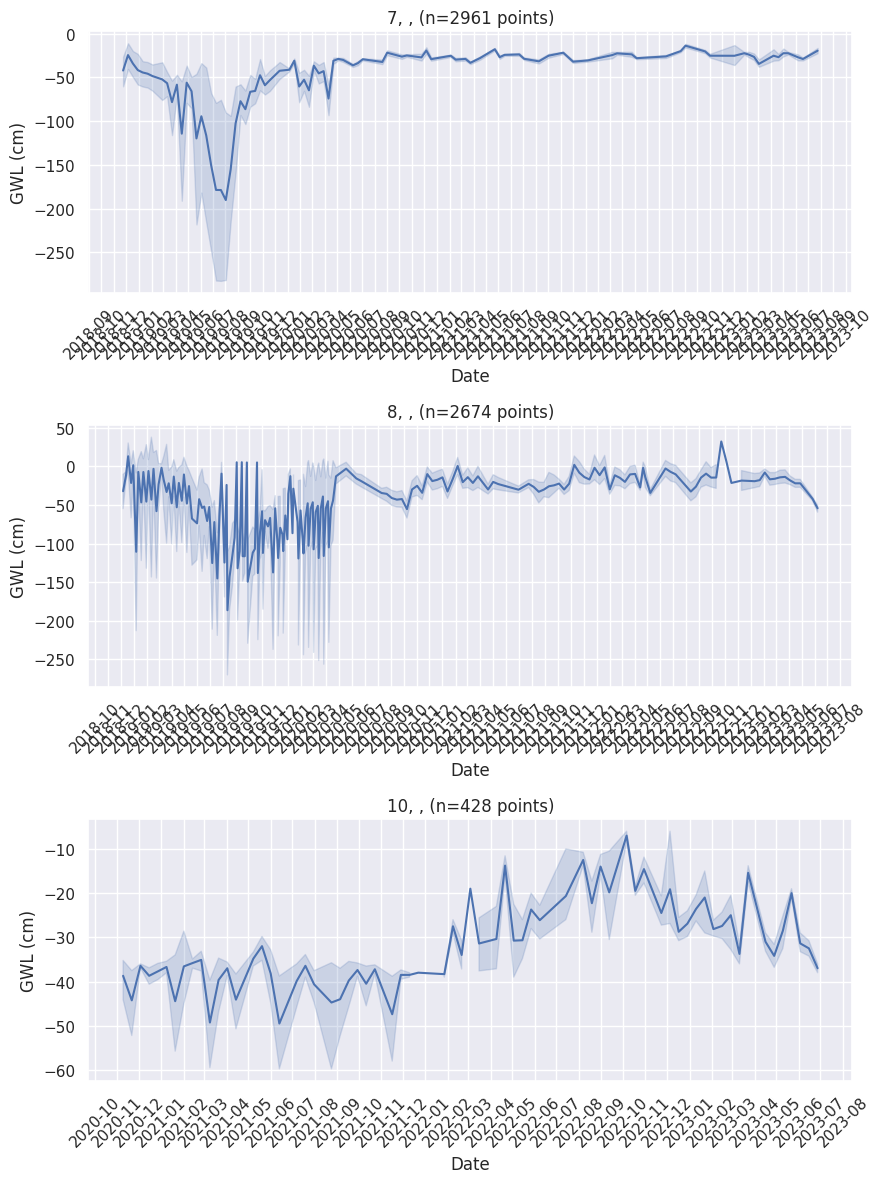

In [18]:
get_ts_plot(filtered_df, y_axis="gwl_cm", group_by="region_id", group_name="region_id")

## Plot GWL_cm vs PHU

Plotting time series for phu_id...


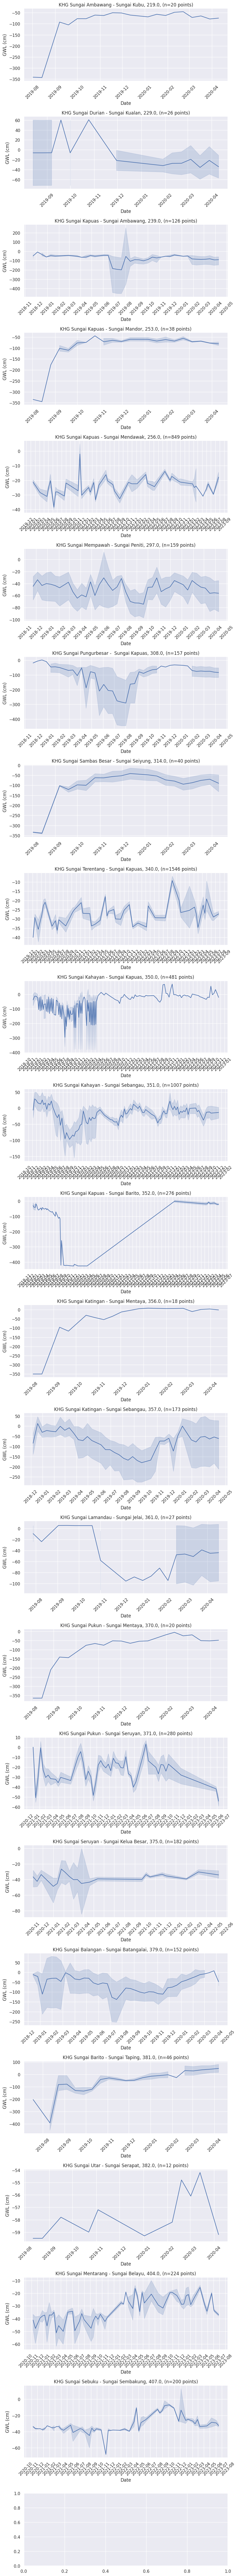

In [15]:
get_ts_plot(filtered_df, y_axis="gwl_cm", group_by="phu_id", group_name="phu_name")

In [ ]:
# Filter all the stations which have less than 60 observations
print("Number of stations with less than 60 observations: ", len(df_grouped[df_grouped.date_count < 60]))
filtered_df = df_grouped[df_grouped.date_count >= 60]
print("Number of stations with more than 60 observations: ", len(filtered_df))

In [ ]:
season_df = df[df.region_id.isin(east_region_ids)]
season_df.loc[:, 'date'] = pd.to_datetime(season_df['date'])  # Ensure 'date' is datetime type
season_df = season_df.set_index('date')
season_df = season_df.sort_index()

aggregated_df = season_df.groupby(['date'])['gwl_cm'].median().reset_index()
aggregated_df.set_index('date', inplace=True)
# Sort the index
aggregated_df = aggregated_df.sort_index()
aggregated_df

In [ ]:
# Get the number of observations per month and year sorted by date
monthly_obs = aggregated_df.resample('M').count()
monthly_obs.plot(title="Number of observations per month")

In [ ]:
# Compare the data between the different sources for the same region
# set the seaborn style and size
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(8,5)})

# plot them in a single a single output
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x="source", y="gwl_cm", data=season_df, width=0.5, ax=axs[0])
# set the number of observations per source in the x-axis
sns.countplot(x="source", data=season_df, ax=axs[1])

In [ ]:
monthly_data_count = season_df["gwl_cm"].resample('M').count()
plt.figure(figsize=(12, 6))
monthly_data_count.plot(kind='bar')
plt.title('Monthly Data Counts')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.show()


In [ ]:
# Create ground waterlevel overtime by source 

# set the seaborn style and size
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(8,5)})
df_by_source = season_df.groupby(['date', "source"])['gwl_cm'].median().reset_index()
df_by_source.set_index('date', inplace=True)
# Sort the index
df_by_source = df_by_source.sort_index()
sns.lineplot(x="date", y="gwl_cm", data=df_by_source, hue="source")
# Set the title
plt.title("Groundwater level over time by source")


In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(aggregated_df['gwl_cm'].groupby(aggregated_df.index).median(), label='Mean')
plt.title('Groundwater Level Over Time aggregated by day')
plt.xlabel('Date')
plt.ylabel('Groundwater Level (cm)')
plt.show()

In [ ]:
season_df.region_id.unique()

In [ ]:
seasonal_decompose_df = season_df[season_df.phu_id == 99]
seasonal_decompose_df = seasonal_decompose_df.groupby(["date"])['gwl_cm'].median().reset_index()
seasonal_decompose_df.set_index('date', inplace=True)
seasonal_decompose_df = seasonal_decompose_df.sort_index()

decomposition = seasonal_decompose(seasonal_decompose_df["gwl_cm"], model='additive', period=30)

# Plot all the components of the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)  # Ensures the same x-axis (date scale)

# Define colors for each plot for better visual distinction
colors = ['blue', 'green', 'red', 'purple']

# Plot the original time series
axes[0].plot(decomposition.observed, label='Original', color=colors[0])
axes[0].legend(loc='best')

# Plot the trend component
axes[1].plot(decomposition.trend, label='Trend', color=colors[1])
axes[1].legend(loc='best')

# Plot the seasonal component
axes[2].plot(decomposition.seasonal, label='Seasonal', color=colors[2])
axes[2].legend(loc='best')

# Plot the residual component as a scatter plot
axes[3].scatter(decomposition.resid.index, decomposition.resid, label='Residual', alpha=0.5, color=colors[3])
axes[3].legend(loc='best')

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Adjust the top margin to make room for the title

# Set a single title for the whole figure
fig.suptitle('Seasonal Analysis of West Area', fontsize=16)

# Show the plot
plt.show()


In [ ]:
# Let's use a rolling window of size 30 days for smoothing
smoothed_seasonal = decomposition.seasonal.rolling(window=30, center=True).mean()

plt.figure(figsize=(14, 7))
plt.plot(decomposition.seasonal.index, decomposition.seasonal, label='Original Seasonal Component')
plt.plot(smoothed_seasonal.index, smoothed_seasonal, color='red', label='Smoothed Seasonal Component')
plt.title('Comparison of Original and Smoothed Seasonal Components')
plt.xlabel('Date')
plt.ylabel('Groundwater Level (cm)')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calculate the mean of the smoothed seasonal component
seasonal_mean = smoothed_seasonal.mean()

# Identify wet and dry months
wet_months = smoothed_seasonal[smoothed_seasonal > seasonal_mean]
dry_months = smoothed_seasonal[smoothed_seasonal <= seasonal_mean]

# Find the lowest and highest months
lowest_month = smoothed_seasonal.idxmin()
highest_month = smoothed_seasonal.idxmax()

# Plotting to visualize wet and dry months
plt.figure(figsize=(14, 7))
plt.plot(smoothed_seasonal.index, smoothed_seasonal, label='Smoothed Seasonal Component')
plt.axhline(y=seasonal_mean, color='gray', linestyle='--', label='Mean Line')
plt.scatter(wet_months.index, wet_months, color='blue', label='Wet Months')
plt.scatter(dry_months.index, dry_months, color='red', label='Dry Months')

# Formatting the x-axis to show every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Optionally set the minor locator to improve grid alignment
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

# Increase figure size or adjust the plot layout to make room for month labels
plt.gcf().autofmt_xdate()  # Auto format date labels to prevent overlap
plt.xticks(rotation=90)  # Rotate labels to fit better if necessary

plt.title('Wet and Dry Months Identification')
plt.xlabel('Date')
plt.ylabel('Groundwater Level (cm)')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Only use from 2020 to the end of 2022
fft_df = aggregated_df.loc['2020':'2022']

# Compute the Fast Fourier Transform (FFT)
fft = np.fft.fft(fft_df['gwl_cm'])
frequencies = np.fft.fftfreq(len(fft), d=1)  # Assuming daily sampling

# Plot spectrum
plt.figure(figsize=(14, 7))
plt.stem(frequencies[:len(fft_df)//2], np.abs(fft)[:len(fft_df)//2], 'b', markerfmt=" ", basefmt="-b")
plt.title('Frequency Domain')
plt.xlabel('Frequency (cycles per day)')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(aggregated_df['gwl_cm'].iloc[:365*2])  # Example: first three years
plt.show()


## All but one stations

In [ ]:
from gee_scripts.randomforest import run_randomforest


In [ ]:
season_df = df[df.region_id.isin(east_region_ids)]

stats_df = run_randomforest(season_df)